PART 1

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 15s 7ms/step - loss: 0.6442 - accuracy: 0.7653 - val_loss: 0.4006 - val_accuracy: 0.8504
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3981 - accuracy: 0.8575 - val_loss: 0.3316 - val_accuracy: 0.8770
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3359 - accuracy: 0.8805 - val_loss: 0.3304 - val_accuracy: 0.8759
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3017 - accuracy: 0.8925 - val_loss: 0.2869 - val_accuracy: 0.8953
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2712 - accuracy: 0.9023 - val_loss: 0.2675 - val_accuracy: 0.9036
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2530 - accuracy: 0.9073 - val_loss: 0.2575 - val_accuracy: 0.9078
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2331 - accuracy: 0.9156 - val_loss: 0.2709 - val_accuracy: 0.9027
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 3ms/step - loss: 0.2649 - accuracy: 0.9084
Test accuracy: 0.9083999991416931


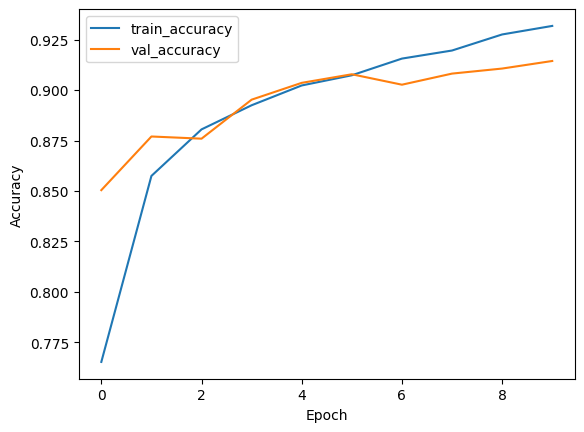

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


PART 2

In [38]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()


train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

train_images = tf.image.resize(
    tf.stack(3 * [train_images], axis=-1),
    (32, 32)
)

test_images = tf.image.resize(
    tf.stack(3 * [test_images], axis=-1),
    (32, 32)
)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False


In [39]:
model_vgg = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model_vgg.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 267786 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [41]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history_vgg = model_vgg.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
    )


Epoch 1/10
750/750 [==============================] - 13s 14ms/step - loss: 0.7515 - accuracy: 0.7289 - val_loss: 0.5317 - val_accuracy: 0.8117 - lr: 0.0010
Epoch 2/10
750/750 [==============================] - 9s 13ms/step - loss: 0.6175 - accuracy: 0.7737 - val_loss: 0.4791 - val_accuracy: 0.8257 - lr: 0.0010
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 0.5770 - accuracy: 0.7884 - val_loss: 0.4721 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 0.5548 - accuracy: 0.7945 - val_loss: 0.4456 - val_accuracy: 0.8370 - lr: 0.0010
Epoch 5/10
750/750 [==============================] - 10s 13ms/step - loss: 0.5353 - accuracy: 0.8037 - val_loss: 0.4400 - val_accuracy: 0.8373 - lr: 0.0010
Epoch 6/10
750/750 [==============================] - 10s 13ms/step - loss: 0.5178 - accuracy: 0.8069 - val_loss: 0.4300 - val_accuracy: 0.8415 - lr: 0.0010
Epoch 7/10
750/750 [==============================] - 11s 1

In [42]:
test_loss, test_acc = model_vgg.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 3s - loss: 0.4111 - accuracy: 0.8522 - 3s/epoch - 10ms/step

Test accuracy: 0.8521999716758728


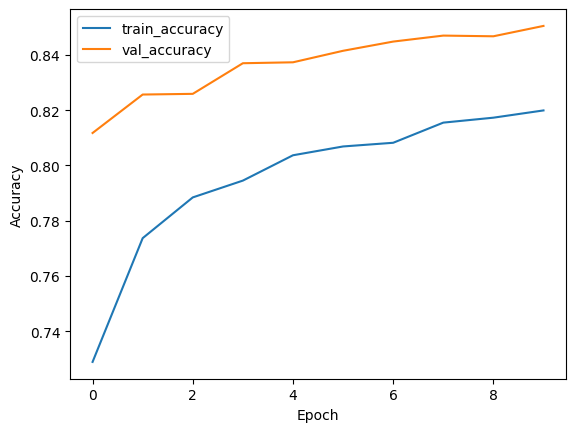

In [43]:
plt.plot(history_vgg.history['accuracy'], label='train_accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
vgg_base_tuned = vgg_base
vgg_base_tuned.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [45]:
vgg_base_tuned.trainable = True
set_trainable = False
for layer in vgg_base_tuned.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [46]:
model_vgg_tuned = models.Sequential([
        vgg_base_tuned,
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

model_vgg_tuned.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model_vgg_tuned.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 512)               0         
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 dense_25 (Dense)            (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 7347210 (28.03 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [47]:
history_vgg_tuned = model_vgg_tuned.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
    )

Epoch 1/10
750/750 [==============================] - 213s 282ms/step - loss: 0.5335 - accuracy: 0.8151 - val_loss: 0.3793 - val_accuracy: 0.8602 - lr: 0.0010
Epoch 2/10
750/750 [==============================] - 17s 23ms/step - loss: 0.3492 - accuracy: 0.8783 - val_loss: 0.3210 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 3/10
750/750 [==============================] - 16s 21ms/step - loss: 0.3045 - accuracy: 0.8928 - val_loss: 0.3536 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2859 - accuracy: 0.8998 - val_loss: 0.3031 - val_accuracy: 0.8924 - lr: 0.0010
Epoch 5/10
750/750 [==============================] - 15s 20ms/step - loss: 0.2687 - accuracy: 0.9059 - val_loss: 0.2975 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 0.2547 - accuracy: 0.9101 - val_loss: 0.2848 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 7/10
750/750 [==============================] - 16

In [48]:
test_loss, test_acc = model_vgg_tuned.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - loss: 0.2896 - accuracy: 0.8989 - 2s/epoch - 8ms/step

Test accuracy: 0.8988999724388123


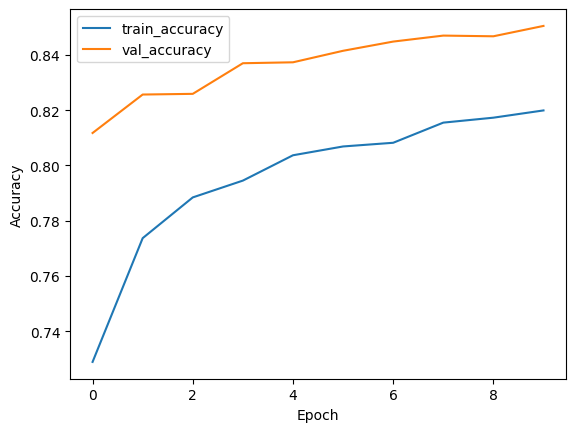

In [49]:
plt.plot(history_vgg.history['accuracy'], label='train_accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Summary:

The VGG16-based neural network can have higher accuracy compared to a self built CNN model. Using a predefined VGG16 model with fine-tuning allows us to take knowledge from larger datasets that the model has previously been trained on and adapt it to our dataset.
Manipulation of parameters such as no. eras, batch size, and dropout have a significant impact on the performance of the final model.